In [1]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import yaml
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os
from scipy import stats

In [117]:
ROOT_DIR = os.getcwd() + '/../'
try:
    with open (ROOT_DIR + '/configuration.yml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')
    
DATA_DIR = ROOT_DIR + config['data']['final'] + '/' + 'all_merged.csv'

data = pd.read_csv(DATA_DIR)

cities = pd.read_csv(ROOT_DIR + config['cities'])

In [53]:

def args_for_lm(data):
    y = np.log(data['concentration'])
    t = data['t']
    lcon = np.log(data['co'])
    X = pd.DataFrame({'lcon' : lcon, 't' : t})
    
    return X, y

def lin_model(X,y):
    lm = linear_model.LinearRegression()
    fit = lm.fit(X,y)
    pred = lm.predict(X)
    
    return lm, fit, pred

def draw_scatterplot_mpl(y, pred, name, axn, x_axis_identical):
    slope, intercept = np.polyfit(y, pred, 1)
    axn.scatter(y, pred, alpha = 0.10)
    axn.plot(y, slope * y + intercept, color='blue', linewidth=0.5)
    
    axn.set(xlabel = 'observed', ylabel = 'predicted')
    axn.set_title(name)
    
    if x_axis_identical:     
        custom_xlim = (0, 10)
        custom_ylim = (3, 11)
        plt.setp(axn, xlim=custom_xlim, ylim=custom_ylim)

    
    
def draw_scatterplot_sns(y, pred, name):
    d = pd.DataFrame({'actual' : y, 'pred' : pred})
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5)
    ax = sns.scatterplot(x = "actual", y = "pred", data = d, alpha = 0.30)
    ax.set_title(name)


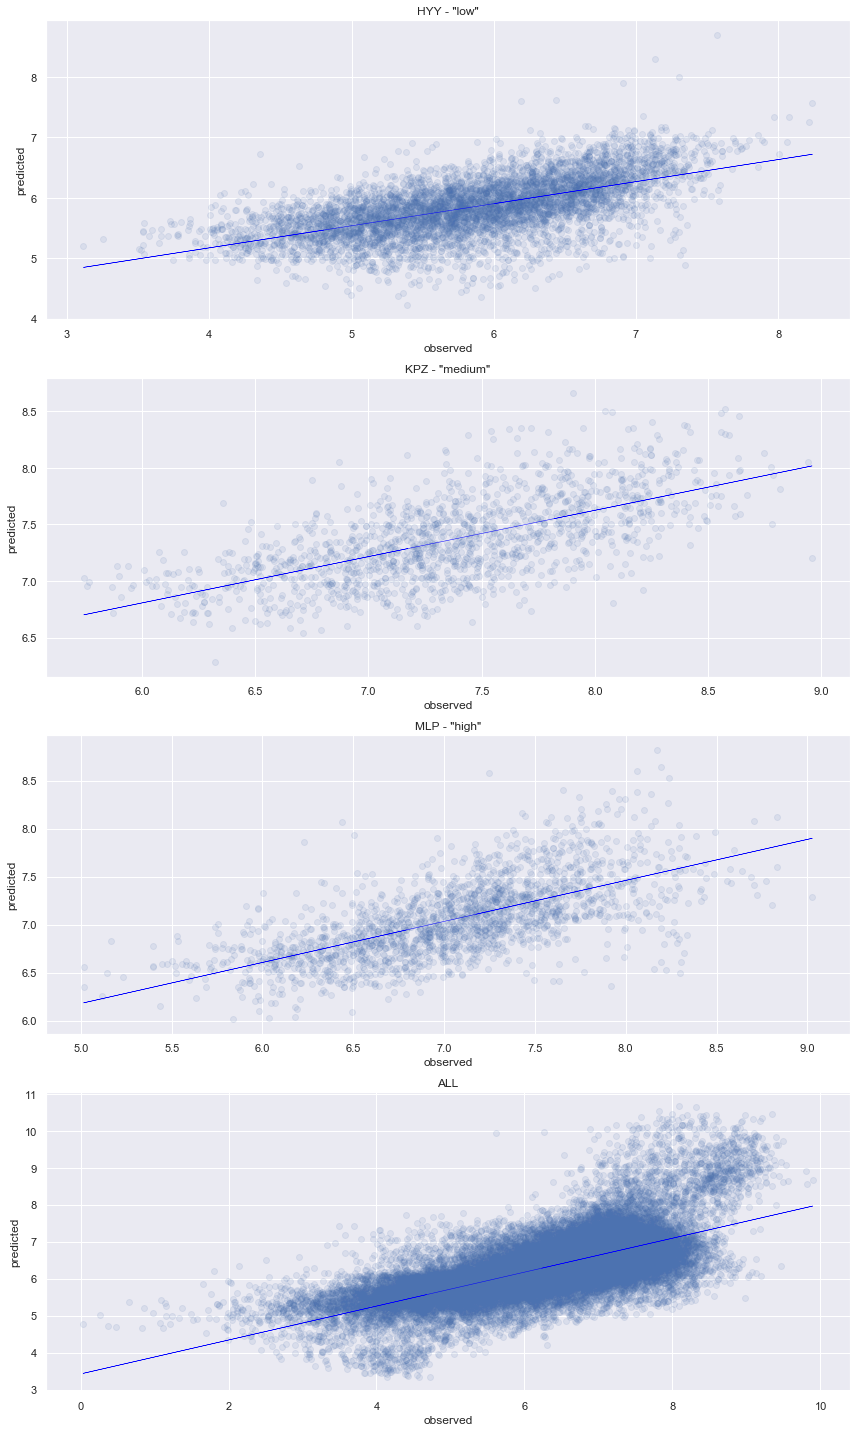

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(12, 20)


data_ss = data[data['city'] == 'HYY']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'HYY - "low"', ax1, False)

data_ss = data[data['city'] == 'KPZ']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'KPZ - "medium"', ax2, False)

data_ss = data[data['city'] == 'MLP']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'MLP - "high"', ax3, False)


X, y = args_for_lm(data)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'ALL', ax4, False)


fig.tight_layout()


### Same as above but with fixed x and y ranges

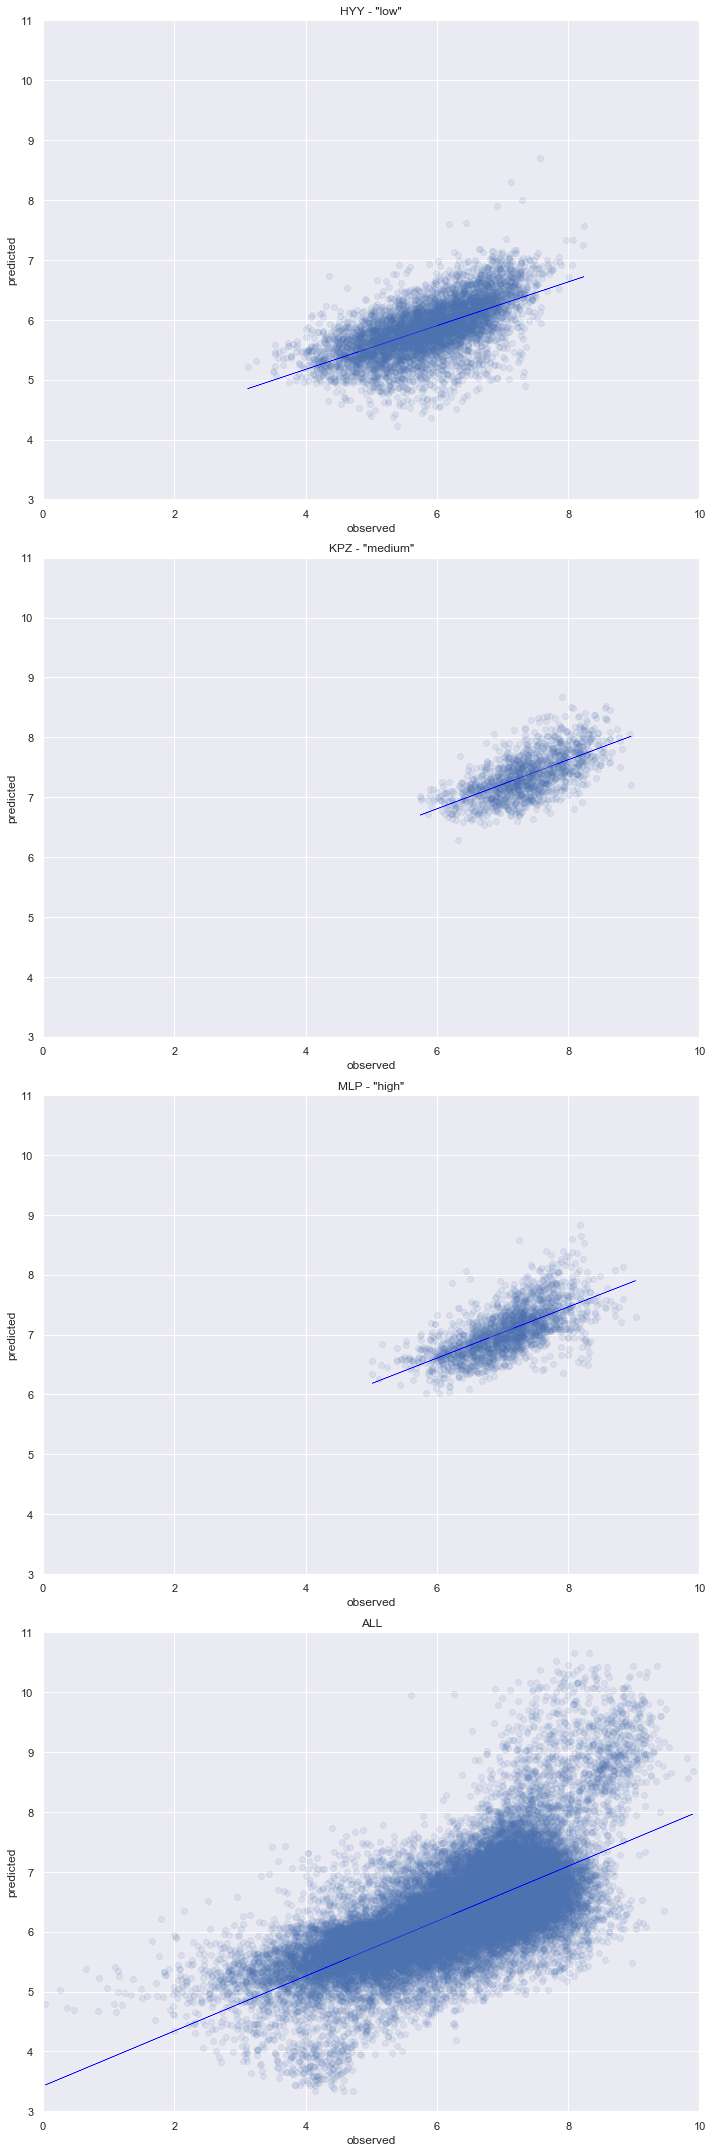

In [69]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(10, 30)


data_ss = data[data['city'] == 'HYY']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'HYY - "low"', ax1, True)

data_ss = data[data['city'] == 'KPZ']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'KPZ - "medium"', ax2, True)

data_ss = data[data['city'] == 'MLP']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'MLP - "high"', ax3, True)


X, y = args_for_lm(data)
lm, fit, pred = lin_model(X,y)

draw_scatterplot_mpl(y,pred,'ALL', ax4, True)


fig.tight_layout()

### Observed vs predicted with location colors

Text(0.5, 1.0, 'ALL')

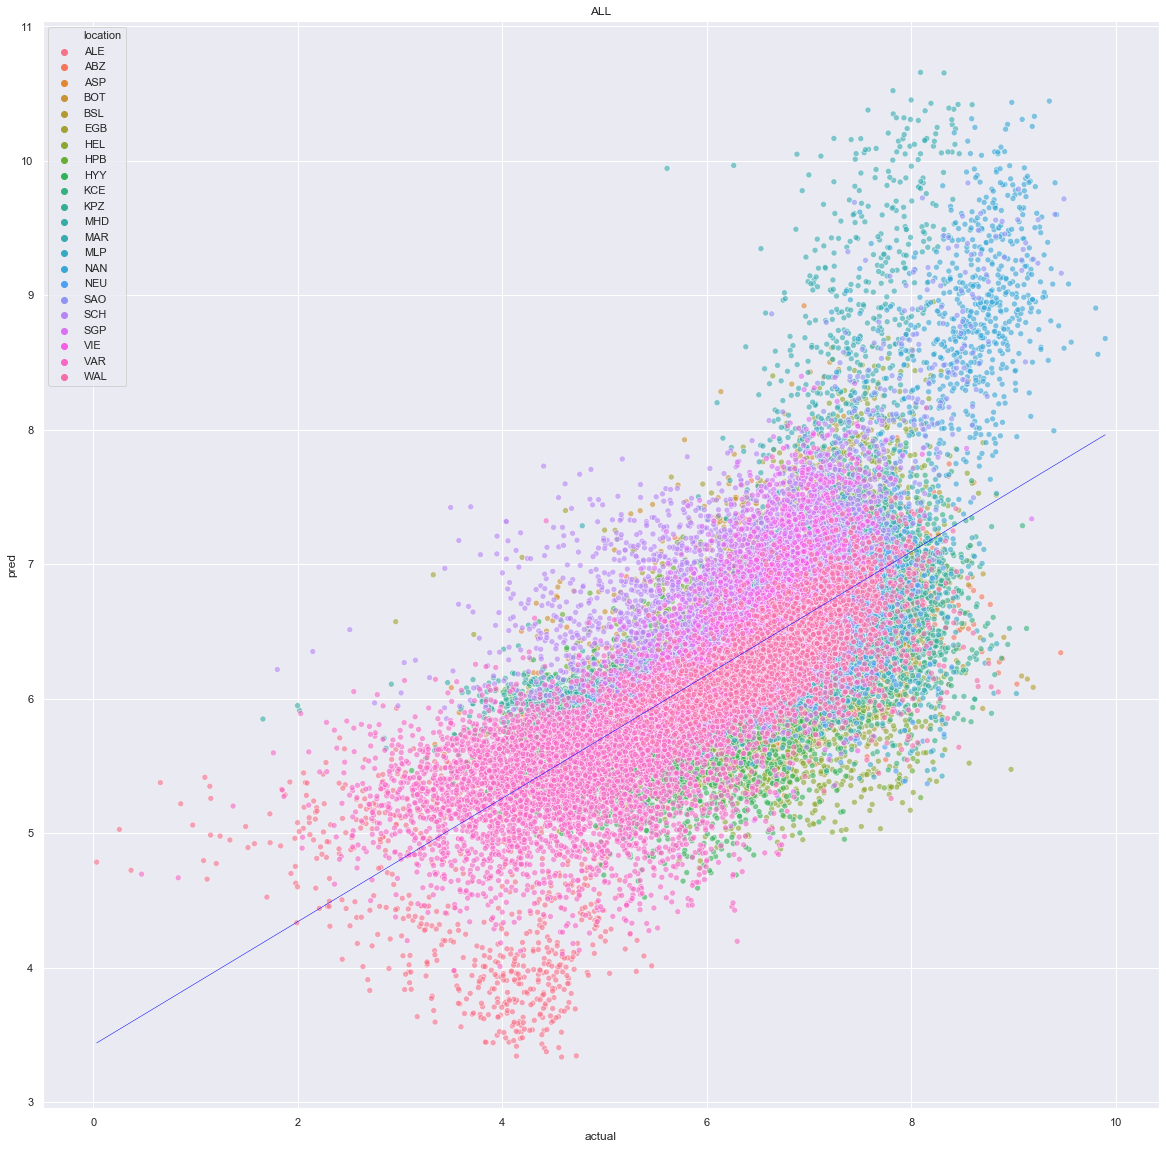

In [70]:
y = np.log(data['concentration'])
t = data['t']
lcon = np.log(data['co'])
locations = data['city']
X = pd.DataFrame({'lcon' : lcon, 't' : t})

lm, fit, pred = lin_model(X,y)

d = pd.DataFrame({'actual' : y, 'pred' : pred, 'location' : locations})
slope, intercept = np.polyfit(y, pred, 1)

plt.figure(figsize=(20, 20))
sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5)
ax = sns.scatterplot(x = "actual", y = "pred", hue = 'location', data = d, alpha = 0.60)
ax.set_title('ALL')


In [90]:
print(lm.score(X,y))
print(model.coef_)
print(model.intercept_)


0.45879615252249606


NameError: name 'model' is not defined

In [115]:
def draw_scatterplot_sns(d, name, axs, i):
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5, ax = axs[i])
    sns.scatterplot(x = "actual", y = "pred", data = d, hue = 'location', style = 'location', alpha = 0.30, ax = axs[i]).set_title(name + ' vs others')

    

def draw_scatterplot_sns2(d, name, axs, i):
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5, ax = axs[i])
    d2 = d[d['location'] == 'OTHER']
    sns.scatterplot(x = "actual", y = "pred", data = d2, alpha = 0.30, ax = axs[i]).set_title(name + ' vs others')
    d3 = d[d['location'] != 'OTHER']
    sns.scatterplot(x = "actual", y = "pred", data = d3, alpha = 0.6, ax = axs[i]).set_title(name + ' vs others')


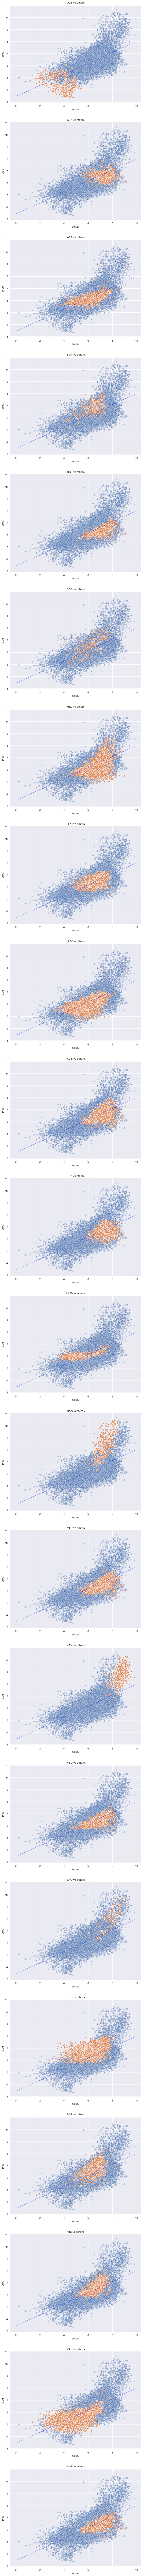

In [116]:
#data_ss = data[(data['city'] == 'KPZ') | (data['city'] == 'HYY')]
data_ss = data
cities = data_ss['city'].unique()
#cities = np.delete(cities, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

n = len(cities)


fig, axs = plt.subplots(n)
fig.set_size_inches(10, 200)

for i, loc in enumerate(cities):
    loc_removed = np.delete(cities, np.where(cities == loc), axis=0)
    locations = data_ss['city'].replace(loc_removed, 'OTHER')
    
    X, y = args_for_lm(data_ss)
    lm, fit, pred = lin_model(X,y)
    
    d = pd.DataFrame({'actual' : y, 'pred' : pred, 'location' : locations})
    
    # draw only half of the points
    #d = d.sample(frac=0.8, replace=True, random_state=1)
    
    draw_scatterplot_sns2(d, loc, axs, i)

#draw_scatterplot_mpl(y,pred,'HYY - "low"', ax1, False)
    